## Text Analysis of Twitter Data
This project would collect Tweets related to a topic to be determined.  Text analysis could be used to determine what the prevailing sentiment is on the subject.  Regional/demographic differences could be identified between posters, which could affect decision making by lawmakers in those areas or marketing of products by companies (depends on the twitter search term chosen).  

In [ ]:
import tweepy
from tweepy import OAuthHandler

In [ ]:
consumer_key = 'YOUR-CONSUMER-KEY'
consumer_secret = 'YOUR-CONSUMER-SECRET'
access_token = 'YOUR-ACCESS-TOKEN'
access_secret = 'YOUR-ACCESS-SECRET'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [ ]:
api = tweepy.API(auth)

In [ ]:
query = "To be determined"
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
results = api.search(q=query, lang=language)

# for each through all tweets pulled
for tweet in results:
   process_or_store(tweet._json)

An example dataset (on the Charlottsville protests of August 2017) is used below; gathering a larger Twitter dataset on the selected topic will require streaming to accumulate data if this is to be used.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)

In [2]:
df = pd.read_csv('~/Desktop/aug18_sample.csv')

In [3]:
df.head()

,id,user_id,user_name,screen_name,user_statuses_count,user_favorites_count,friends_count,followers_count,user_location,user_description,user_time_zone,user_profile_text_color,user_profile_background_color,full_text,created_at,is_retweet,retweeted_status_text,retweeted_status_id,quoted_status_text,quoted_status_id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,hashtags
0,898577667326230529,735878685941768194,TorontoNews,torontonews3,179081,12,115,1120,NaN,NaN,NaN,333333,F5F8FA,"It's stress eating, Tina Fey-style, in a new ‘...",2017-08-18 16:09:45,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,898535539967537152,165171140,Amy Stephenson,amylynn4215,196,31,177,24,"Dallas, TX",NaN,Central Time (US & Canada),333333,C0DEED,@realDonaldTrump @POTUS Hey little buddy! Loo...,2017-08-18 13:22:21,f,NaN,NaN,"""Three fundraising organizations have pulled t...",8.985350e+17,realDonaldTrump,NaN,25073877.0,NaN
2,898556800923979776,3411126935,Ex GOP Penny,Pennychastain1,15910,8675,745,1325,NaN,"a Christian, wife, mother, defender of Constit...",NaN,333333,C0DEED,https://t.co/WtYV3rWh4N,2017-08-18 14:46:50,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,898419024119209986,6389182,Melissa,melissarocks,27191,82943,318,463,Northern Virginia,Massage diva. Bleeding heart. Liberal. Pro-lov...,Eastern Time (US & Canada),333333,FFF04D,"Good. Stay there, roach. Your hate doesn't bel...",2017-08-18 05:39:21,f,NaN,NaN,"""Jason Kessler, Charlottesville rally organize...",8.984021e+17,NaN,NaN,NaN,NaN
4,898416456718704642,34478310,real1rock,lakersgirl18,8459,10193,240,142,"Vegas, USA","TECH, GYM, SPORTS, & SHOE ADDICT\nStriving to ...",Pacific Time (US & Canada),000000,000000,@sharn67 lol https://t.co/uGnAlbOTsi,2017-08-18 05:29:09,f,NaN,NaN,"""Post-Charlottesville covers of The Economist,...",8.982970e+17,sharn67,NaN,621498571.0,NaN


In [4]:
df.shape

(50000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
id                               50000 non-null int64
user_id                          50000 non-null int64
user_name                        50000 non-null object
screen_name                      50000 non-null object
user_statuses_count              50000 non-null int64
user_favorites_count             50000 non-null int64
friends_count                    50000 non-null int64
followers_count                  50000 non-null int64
user_location                    35912 non-null object
user_description                 42596 non-null object
user_time_zone                   31226 non-null object
user_profile_text_color          50000 non-null object
user_profile_background_color    50000 non-null object
full_text                        50000 non-null object
created_at                       50000 non-null object
is_retweet                       50000 non-null object
retweeted_status_

In [6]:
%matplotlib inline 
import nltk
import string
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#### Top keywords

In [7]:
top_N = 30
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df['full_text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)

rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

rslt = rslt.iloc[1:]

/Users/mollymcnamara/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


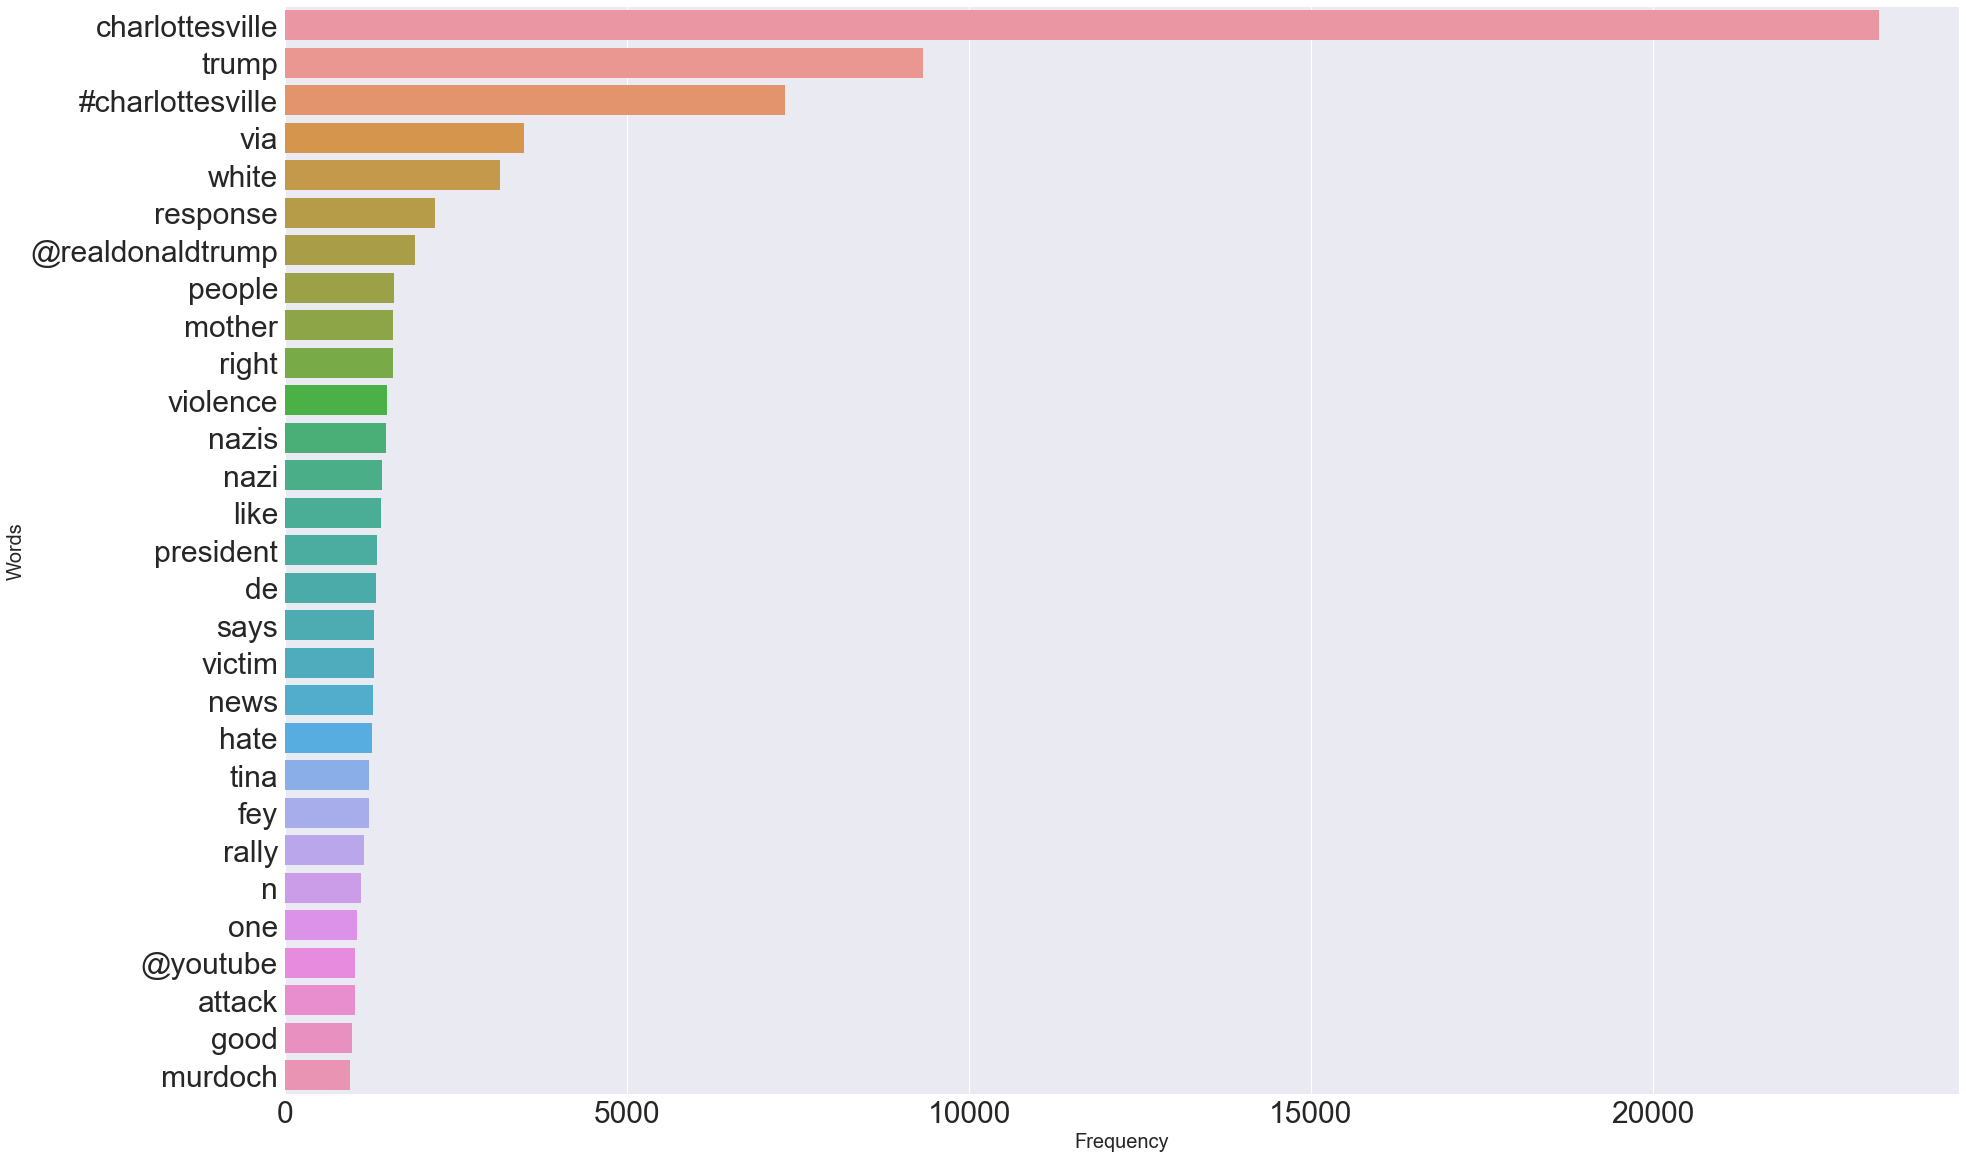

In [8]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x='Frequency', data=rslt)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Words",fontsize=20)
ax.tick_params(labelsize=30)

#### Top hashtags

In [9]:
tags = (df['hashtags']
           .str.lower()
           .str.cat(sep=' ')
           .split()
)

hashtgs = pd.DataFrame(Counter(tags).most_common(top_N),
                    columns=['Hashtags', 'Frequency']).set_index('Hashtags')
hashtgs = hashtgs.iloc[1:]

/Users/mollymcnamara/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


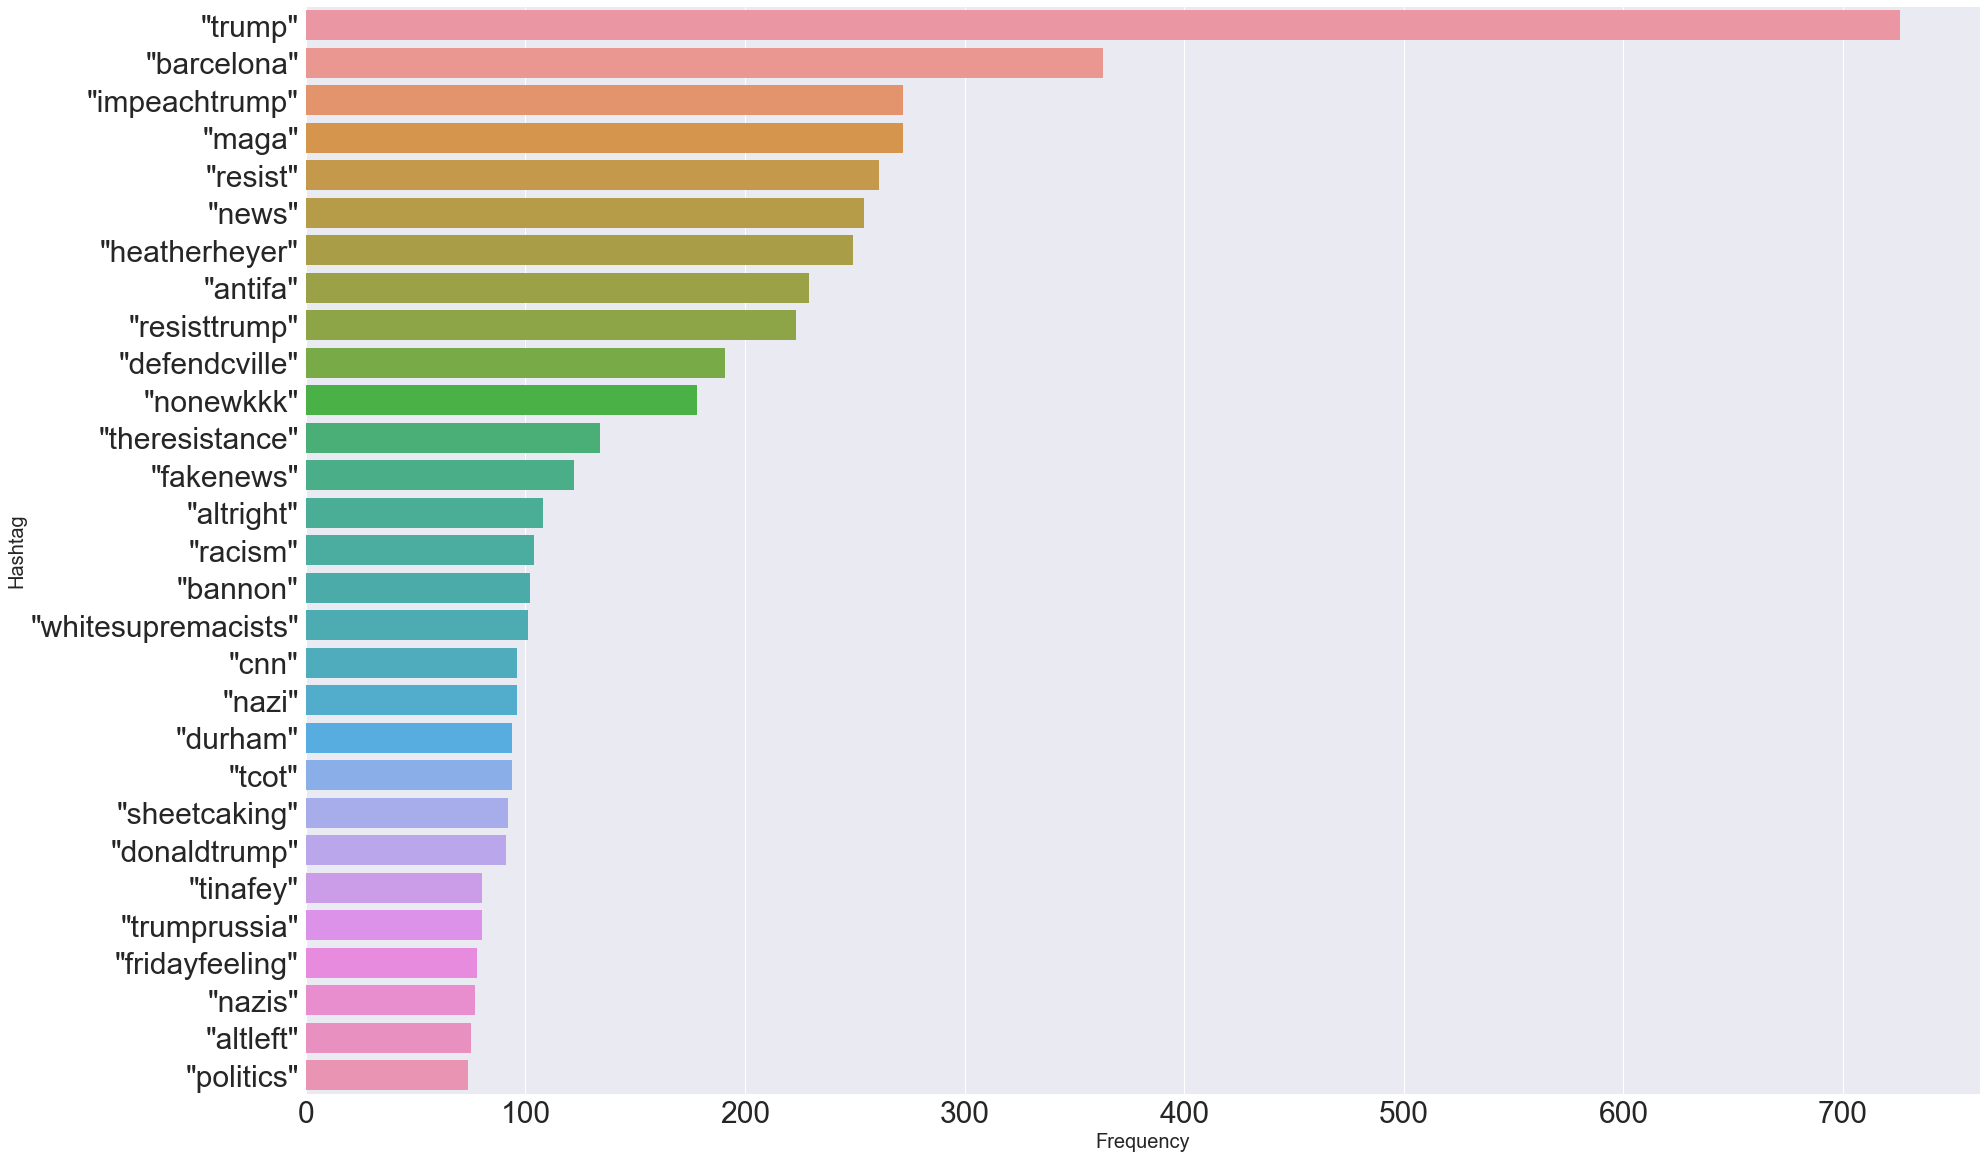

In [10]:
sns.set_style("darkgrid")
ax = sns.barplot(y=hashtgs.index, x='Frequency', data=hashtgs)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Hashtag",fontsize=20)
ax.tick_params(labelsize=30)